# Pancreatitis scRNA-seq Data - Reananalysis

# 1. Download and Initial Processing for Doublet Filtering

The data analysed in this notebook is from Poggetto E; Ho I et al Science 2025 (PMID:34529467). Data can be found on GEO under accession number GSM5494073. ScRNA-seq data are stored in the series GSE181276. The link below can be found by going to https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE181276 and with right click copy the "http" hyperlink in the Download column. 

The flags are required to download this file otherwise it downloads only a HTML page: <br>
-L --> redirects it to the actual file (*_genes.counts_*.txt.gz), without it would only download a HTML page. <br>
-O --> tells curl that it saves the file using the URL filename (without it would be in printed in the terminal) <br>
-J --> tells curl to use the name instead of the final url segment

In [1]:
#Create new direcotry for rawdata
!mkdir -p rawdata
# Download data using curl
!cd rawdata && curl -L -O -J "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE181276&format=file&file=GSE181276_genes.counts_for_GEO_uploading.txt.gz"
# Unzip the gene_counts file in the rawdata folder
!cd rawdata && gunzip "GSE181276_genes.counts_for_GEO_uploading.txt.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  105M  100  105M    0     0  23.7M      0  0:00:04  0:00:04 --:--:-- 25.0M


In [2]:
#Import of software packages
import scanpy as sc
import scvi
import pandas as pd
import seaborn as sns

In [15]:
# Read file but transpose it as Anndata and Scanpy require cells (barcodes) as rows and gene names in columns (but file has gene names as rows)
adata = sc.read_text('rawdata/GSE181276_genes.counts_for_GEO_uploading.txt').T

In [16]:
# adata.obs contains cell barcodes
adata.obs

""
WT_AAACCCAAGCATCTTG
WT_AAACCCAAGGGTTGCA
WT_AAACCCAGTCCGAAAG
WT_AAACCCAGTCCGTTTC
WT_AAACCCAGTGTGGTCC
...
D7_analysis_TTTGTTGGTGAGCAGT
D7_analysis_TTTGTTGGTGCCTGAC
D7_analysis_TTTGTTGGTTGAGAGC
D7_analysis_TTTGTTGTCCTTATAC


In [17]:
#adata.var contains Gene Names
adata.var

""
Xkr4
Gm1992
Gm37381
Rp1
Sox17
...
AC168977.1
AC149090.1
CAAA01118383.1
Vmn2r122


In [18]:
# Shows size of count matrix (n_cells, n_genes)
adata.shape

(33681, 31053)

In [19]:
Total_gene_number = adata.shape[1]

In [20]:
# Filter to remove genes occuring in less than 10 cells
sc.pp.filter_genes(adata, min_cells=10)

In [21]:
Gene_Number_after_filtering = adata.shape[1]

In [22]:
Loss_of_genes = round((Total_gene_number-Gene_Number_after_filtering)/Total_gene_number*100,2)
Loss_of_genes

43.56

## Doublet Removal

In [23]:
# Subsetting the highly variable genes to train the ScVI model
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor='seurat_v3')

In [24]:
# adata shape after subsetting
adata

AnnData object with n_obs × n_vars = 33681 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [25]:
# Train the SCVI Model (required for doublet removal model SOLO)
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training:   0%|          | 0/238 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=238` reached.


In [26]:
# Train the doublet class model (it has an stop inside if loss is not changing anymore)
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.208. Signaling Trainer to stop.


In [36]:
# Use predict to annotate the cell barcodes with the trained identifier and annotate it as a string in "doublet" or "singlet"
df = solo.predict()

/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


In [38]:
df

,doublet,singlet
WT_AAACCCAAGCATCTTG,0.042626,0.957374
WT_AAACCCAAGGGTTGCA,0.083739,0.916261
WT_AAACCCAGTCCGAAAG,0.100618,0.899382
WT_AAACCCAGTCCGTTTC,0.110715,0.889285
WT_AAACCCAGTGTGGTCC,0.002668,0.997332
...,...,...
D7_analysis_TTTGTTGGTGAGCAGT,0.018691,0.981309
D7_analysis_TTTGTTGGTGCCTGAC,0.348716,0.651284
D7_analysis_TTTGTTGGTTGAGAGC,0.102786,0.897214
D7_analysis_TTTGTTGTCCTTATAC,0.123136,0.876864


In [39]:
df['prediction'] = solo.predict(soft=False)
df

/Users/thorsten/.pyenv/versions/3.10.6/envs/SingleCell/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
WT_AAACCCAAGCATCTTG,0.042626,0.957374,singlet
WT_AAACCCAAGGGTTGCA,0.083739,0.916261,singlet
WT_AAACCCAGTCCGAAAG,0.100618,0.899382,singlet
WT_AAACCCAGTCCGTTTC,0.110715,0.889285,singlet
WT_AAACCCAGTGTGGTCC,0.002668,0.997332,singlet
...,...,...,...
D7_analysis_TTTGTTGGTGAGCAGT,0.018691,0.981309,singlet
D7_analysis_TTTGTTGGTGCCTGAC,0.348716,0.651284,singlet
D7_analysis_TTTGTTGGTTGAGAGC,0.102786,0.897214,singlet
D7_analysis_TTTGTTGTCCTTATAC,0.123136,0.876864,singlet


In [40]:
# Count how many cells are predicted as singlet or doublet
counts = df.groupby('prediction').count()

# Total number of cells
total = counts.sum().values[0]  # or len(df)

# Number of predicted doublets
num_doublets = df.groupby('prediction').count().loc['doublet','doublet']

# Percentage of doublets
percent_doublets = (num_doublets / total) * 100

print(f"Doublets: {num_doublets} / {total} ({percent_doublets:.2f}%)")

Doublets: 4931 / 33681 (14.64%)


In [50]:
df.groupby('prediction').count()

,doublet,singlet,dif
prediction,,,
doublet,4931,4931,4931
singlet,28750,28750,28750


In [57]:
# Generate a list containing only filtered doublet cells (to not loose to much data)
doublets = df[(df['prediction'] == 'doublet')]
doublets

,doublet,singlet,prediction,dif
WT_AAAGAACGTGAGTGAC,0.725324,0.274676,doublet,0.450648
WT_AAAGGATCAACCCTAA,0.934642,0.065358,doublet,0.869284
WT_AAAGGGCCAACCAGAG,0.600469,0.399531,doublet,0.200939
WT_AAAGGGCTCAAATGAG,0.602147,0.397853,doublet,0.204295
WT_AAAGGTAAGACATATG,0.654534,0.345466,doublet,0.309067
...,...,...,...,...
D7_analysis_TTTGACTTCGATTGGT,0.817020,0.182980,doublet,0.634039
D7_analysis_TTTGACTTCTCAGGCG,0.734798,0.265202,doublet,0.469596
D7_analysis_TTTGATCGTAGTGCGA,0.529101,0.470899,doublet,0.058202
D7_analysis_TTTGGTTCACTTCAGA,0.744804,0.255196,doublet,0.489607


We loose 14.64% of cells to doublets. However, since we still have around 29K cells I am here rather strict and do not include a step to select for predictions which are weak in their scores (similar doublet and singlet score). However, I include the script how to filter if it should become necessary later in a sub-chapter.

### 1.1.1 Filtering Doublet Scores to include questionable cells (optional!)

In [52]:
#Calculating the difference of doublet and singlet score to identify cells that have high scores in both (close to 0)
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
WT_AAACCCAAGCATCTTG,0.042626,0.957374,singlet,-0.914749
WT_AAACCCAAGGGTTGCA,0.083739,0.916261,singlet,-0.832521
WT_AAACCCAGTCCGAAAG,0.100618,0.899382,singlet,-0.798764
WT_AAACCCAGTCCGTTTC,0.110715,0.889285,singlet,-0.778571
WT_AAACCCAGTGTGGTCC,0.002668,0.997332,singlet,-0.994664
...,...,...,...,...
D7_analysis_TTTGTTGGTGAGCAGT,0.018691,0.981309,singlet,-0.962618
D7_analysis_TTTGTTGGTGCCTGAC,0.348716,0.651284,singlet,-0.302567
D7_analysis_TTTGTTGGTTGAGAGC,0.102786,0.897214,singlet,-0.794428
D7_analysis_TTTGTTGTCCTTATAC,0.123136,0.876864,singlet,-0.753729


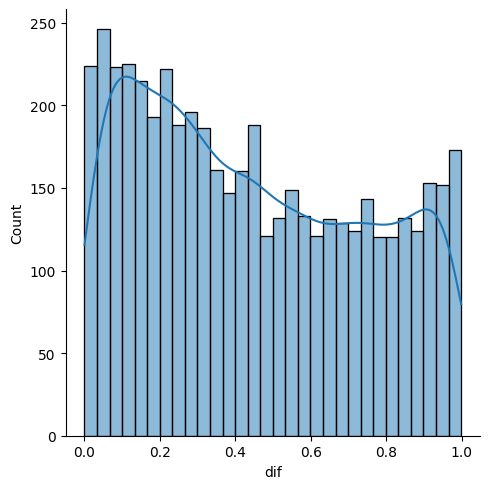

In [54]:
#Use seaborn to show histogram of dif and decide emperically a cutoff
sns.displot(df[df.prediction == 'doublet'], x= 'dif', bins=30, kde=True)

In [49]:
# Show some random samples in the doublet group to better understand the histogram
df[df.prediction =='doublet'].sample(10)

,doublet,singlet,prediction,dif
D1_analysis_TTGCATTAGGACATCG,0.557234,0.442766,doublet,0.114469
WT_CAAGACTGTTACTCAG,0.612009,0.387991,doublet,0.224018
D28_analysis_CTCTCGAAGGATAATC,0.761302,0.238698,doublet,0.522603
WT_TGCGGGTCATCAGCGC,0.615372,0.384628,doublet,0.230745
D28_analysis_GAGTTGTGTGCGAACA,0.546706,0.453294,doublet,0.093413
D7_analysis_TTGGATGGTTCTCCTG,0.803706,0.196294,doublet,0.607412
WT_AAAGGGCCAACCAGAG,0.600469,0.399531,doublet,0.200939
D28_analysis_CAAGACTAGTCCCGAC,0.966415,0.033585,doublet,0.932830
D1_analysis_AGTTAGCTCGCCTTTG,0.713393,0.286607,doublet,0.426786
D28_analysis_AGTAGTCAGCATCCTA,0.643487,0.356513,doublet,0.286973


From this probably a cut-off of dif < 0.2 seems aceptable. So everything below 0.2 could be still seen as singlet (not so high doublet score and also a quite high singlet score) and everything above definitely as doublet.

In [ ]:
# Generate a list containing only filtered doublet cells (to not loose to much data)
doublets = df[(df['prediction'] == 'doublet') & (df.dif > 0.2)]
doublets

## Doublet Removal (continue)

In [58]:
# Reload adata and annotate doublet annotation on all barcodes/cells (before we filtered out already many cells to train the model!)
adata = sc.read_text('rawdata/GSE181276_genes.counts_for_GEO_uploading.txt').T
# This annotates the cells with True/false True = doublet, false = singlet
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs

,doublet
WT_AAACCCAAGCATCTTG,False
WT_AAACCCAAGGGTTGCA,False
WT_AAACCCAGTCCGAAAG,False
WT_AAACCCAGTCCGTTTC,False
WT_AAACCCAGTGTGGTCC,False
...,...
D7_analysis_TTTGTTGGTGAGCAGT,False
D7_analysis_TTTGTTGGTGCCTGAC,False
D7_analysis_TTTGTTGGTTGAGAGC,False
D7_analysis_TTTGTTGTCCTTATAC,False


In [60]:
# Filter all cells out which are not doublet (so keep all singlets)
adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 28750 × 31053
    obs: 'doublet'

## Preprocessing 

### Filtering of Low-Quality Cells Based on Mitochondrial and Ribosomal Content

In [64]:
# Download and read ribosomal genes into python using MsigDB KEGG Ribosome Gene enrichment term.
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
# When reading the txt file we need to skip the first two rows since those contain the linke and the KEGG Pathway name. 
ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


As we can see, the ribosomal gene names in our list follow the human naming convention, where all letters are capitalized. However, our dataset is from mouse, and in mouse gene nomenclature, only the first letter is capitalized while the rest are lowercase (see code output below). Therefore, we need to adjust our ribosomal gene list accordingly by converting the gene names to the correct mouse format.

In [70]:
adata.var_names[adata.var_names.str.contains("Rps")]

Index(['Rps6kc1', 'Rps21', 'Rps4x', 'Rps6ka6', 'Rps6ka3', 'Rps3a1', 'Rps27',
       'Rps20', 'Rps6', 'Rps8', 'Rps6ka1', 'Rps9', 'Rps5', 'Rps19', 'Rps16',
       'Rps11', 'Rps17', 'Rps3', 'Rps13', 'Rps15a', 'Rps12', 'Rps15', 'Rps26',
       'Rps24', 'Rps25', 'Rps27l', 'Rps27rt', 'Rpsa', 'Rps27a', 'Rps6kb1',
       'Rps23', 'Rps7', 'Rps29', 'Rps6kl1', 'Rps6ka5', 'Rps19bp1', 'Rps6ka2',
       'Rps2', 'Rps10', 'Rps28', 'Rps18', 'Rps14', 'Rps6kb2', 'Rps6ka4',
       'Rps12-ps3'],
      dtype='object')

In [76]:
# Update Ribosome list so that only first letter is capitalized
ribo_genes[0] = ribo_genes[0].apply(lambda x: x.capitalize())
ribo_genes

,0
0,Fau
1,Mrpl13
2,Rpl10
3,Rpl10a
4,Rpl10l
...,...
83,Rps9
84,Rpsa
85,Rsl24d1
86,Rsl24d1p11


,0
0,Fau
1,Mrpl13
2,Rpl10
3,Rpl10a
4,Rpl10l
...,...
83,Rps9
84,Rpsa
85,Rsl24d1
86,Rsl24d1p11
